In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq

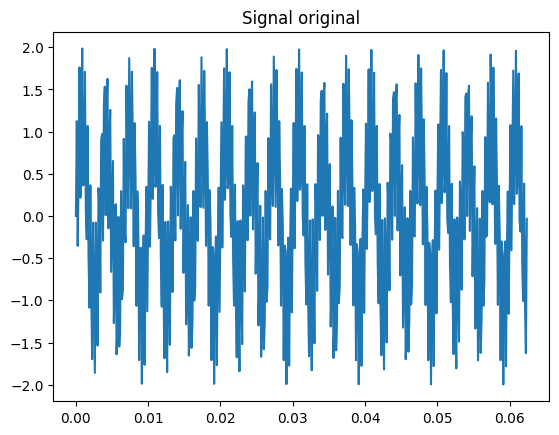

In [2]:
fs = 8000
t = np.linspace(0,1,fs)

signal = np.sin(2*np.pi*300*t) + np.sin(2*np.pi*2600*t)

plt.plot(t[:500], signal[:500])
plt.title("Signal original")
plt.show()

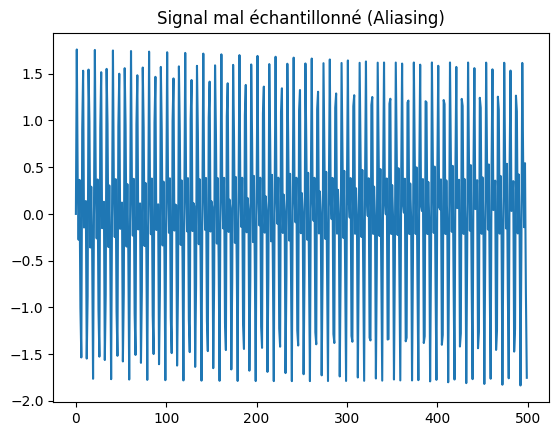

In [3]:
signal_bad = signal[::4]

plt.plot(signal_bad[:500])
plt.title("Signal mal échantillonné (Aliasing)")
plt.show()

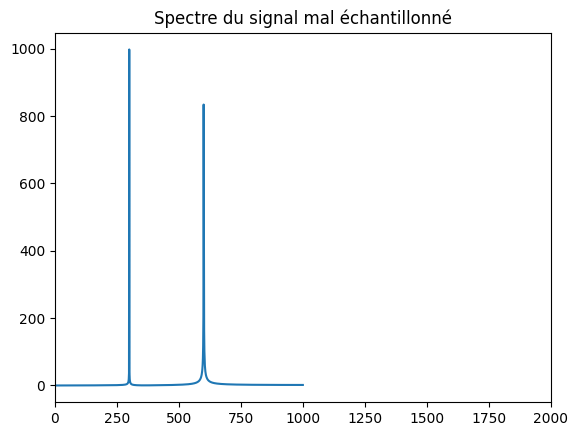

In [4]:
from scipy.fft import rfft, rfftfreq

S = np.abs(rfft(signal_bad))
freq = rfftfreq(len(signal_bad), 1/(fs/4))

plt.plot(freq, S)
plt.title("Spectre du signal mal échantillonné")
plt.xlim(0,2000)
plt.show()

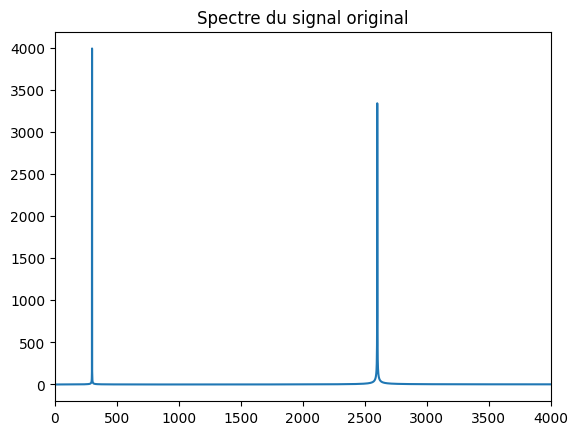

In [5]:
S_original = np.abs(rfft(signal))
freq_original = rfftfreq(len(signal), 1/fs)

plt.plot(freq_original, S_original)
plt.title("Spectre du signal original")
plt.xlim(0,4000)
plt.show()

Analyse du phénomène d’aliasing

Dans ce mini-projet, nous avons généré un signal composé de deux fréquences : 300 Hz et 2600 Hz.

Lorsque le signal est échantillonné correctement (fs = 8000 Hz), le spectre montre clairement les deux composantes fréquentielles.

Cependant, lorsque la fréquence d’échantillonnage est réduite (fs/4), la fréquence de Nyquist devient insuffisante.

Selon le théorème de Shannon, il faut :

fs ≥ 2 × fmax

Dans notre cas :

fmax = 2600 Hz
2 × fmax = 5200 Hz

Or fs réduit = 2000 Hz < 5200 Hz

Donc le théorème est violé, ce qui provoque le phénomène d’aliasing.

La fréquence élevée se replie dans la bande utile, créant une fréquence fantôme visible dans le spectre.

In [6]:
!pip install librosa

In [10]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq

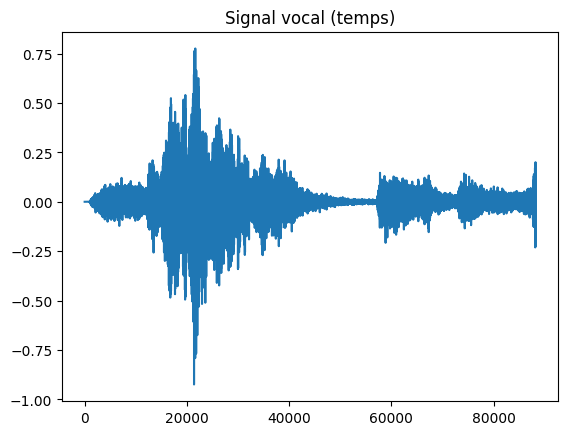

Fréquence d'échantillonnage : 16000


In [11]:
y, sr = librosa.load("voice.wav", sr=None)

plt.figure()
plt.plot(y)
plt.title("Signal vocal (temps)")
plt.show()

print("Fréquence d'échantillonnage :", sr)

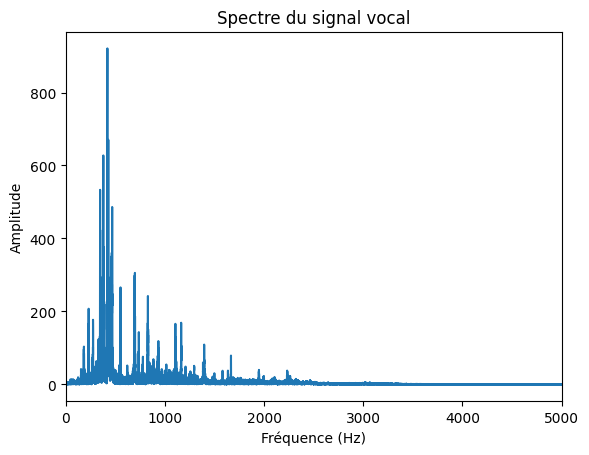

In [12]:
from scipy.fft import rfft, rfftfreq

# Calcul FFT
S = np.abs(rfft(y))
freq = rfftfreq(len(y), 1/sr)

plt.figure()
plt.plot(freq, S)
plt.title("Spectre du signal vocal")
plt.xlim(0, 5000)   # On regarde jusqu'à 5 kHz
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Amplitude")
plt.show()

Nouvelle fréquence : 4000


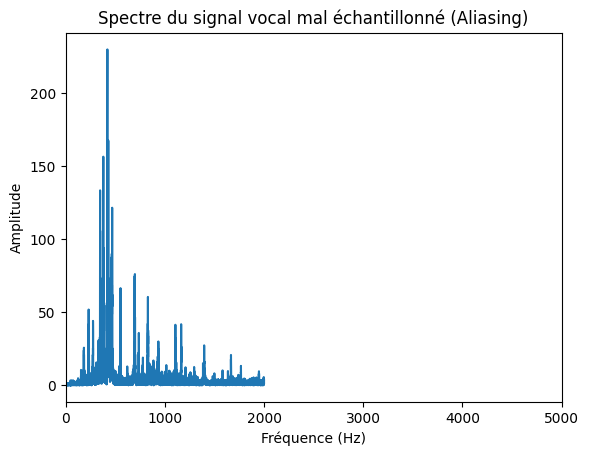

In [13]:
# Réduction de la fréquence d’échantillonnage (division par 4)
y_bad = y[::4]
sr_bad = sr // 4

print("Nouvelle fréquence :", sr_bad)

# Spectre du signal mal échantillonné
S_bad = np.abs(rfft(y_bad))
freq_bad = rfftfreq(len(y_bad), 1/sr_bad)

plt.figure()
plt.plot(freq_bad, S_bad)
plt.title("Spectre du signal vocal mal échantillonné (Aliasing)")
plt.xlim(0, 5000)
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Amplitude")
plt.show()

Analyse de l’aliasing sur un signal vocal

Après réduction de la fréquence d’échantillonnage par 4, la nouvelle fréquence devient 4000 Hz.

La fréquence de Nyquist est alors :

Nyquist = 4000 / 2 = 2000 Hz

Or, la voix contient des composantes supérieures à 2000 Hz.

Selon le théorème de Shannon :

fs ≥ 2 × fmax

Cette condition n’est plus respectée.

Les composantes supérieures à 2000 Hz se replient dans la bande utile, provoquant une distorsion spectrale appelée aliasing.